<a href="https://colab.research.google.com/github/sfragkoul/Intro/blob/main/3_Matplotlib_PUBLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook by Stella Fragkouli based on "Introduction to Scientific Computing in Python" by Robert Johansson. 


Aristotle University of Thessaloniki

v1.0 (March 2021)

# Chapter 5: matplotlib - 2D and 3D plotting in Python

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures.

[matplotlib](https://matplotlib.org/)

In [ ]:
# This line configures matplotlib to show figures embedded in the notebook,
# instead of opening a new window for each figure. More about that later.
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### 5.2 MATLAB-like API (Application Programming interface)

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided
by matplotlib.
It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if
you are familiar with MATLAB.
To use this API from matplotlib, we need to include the symbols in the **pylab** module

[Reference quote](https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm)

PyLab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space. Although many examples use PyLab, it is no longer recommended.

In [ ]:
from pylab import *

In [ ]:
# A simple figure with MATLAB-like plotting API

x = np.linspace(0, 5, 10)
y = x ** 2

x

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

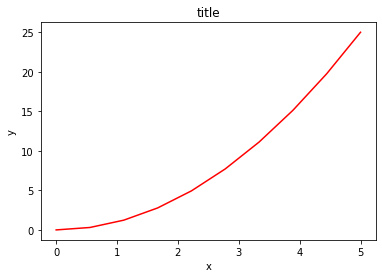

In [ ]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title');


# Python does not require semi-colons to terminate statements. 
# Semi colons can be used to delimit statements if you wish to put multiple statements on the same line.

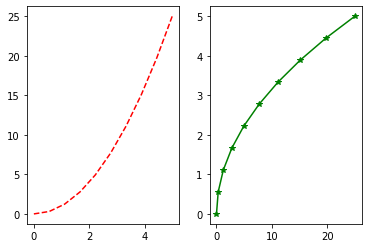

In [ ]:
#Most of the plotting related functions in MATLAB are covered by the pylab module. For example, subplot and color/symbol selection

subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-')

# How to figure out how to use subplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html


The pylab MATLAB-style API is easy to get started with if you are familiar
with MATLAB, and it has a minumum of coding overhead for simple plots.

It is recommended though learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with.

### 5.3 The matplotlib object-oriented API

To use the object-oriented API we start out very much like in the previous example, we store a reference to the newly created figure instance in the fig variable, and from it we create a new axis instance axes using the **add_axes** method in the Figure class instance fig

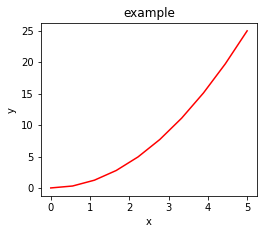

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.5, 0.6]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('example');

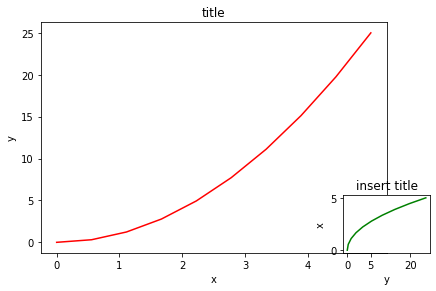

In [ ]:
#Although a little bit more code is involved, the advantage is that we now have full control of where the plot
#axes are placed, and we can easily add more than one axis to the figure

fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.8, 0.1, 0.2, 0.2]) # inset axes
# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')
# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');



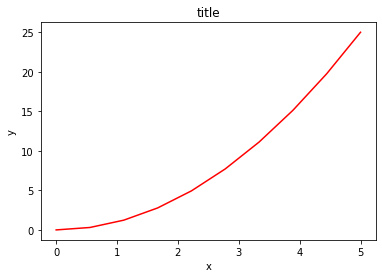

In [ ]:
fig, axes = plt.subplots()
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

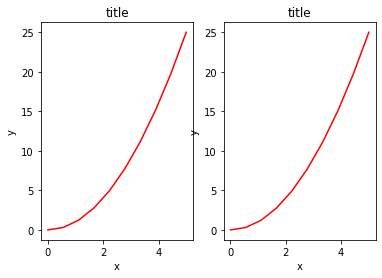

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
  ax.plot(x, y, 'r')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right? We can deal with that by using the **fig.tight** layout method, which automatically adjusts the positions
of the axes on the figure canvas so that there is no overlapping content:

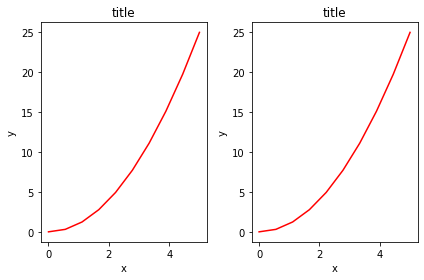

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
  ax.plot(x, y, 'r')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')
fig.tight_layout()

To save a figure to a file we can use the **savefig** method in the Figure class

In [ ]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between dierent output formats:

PNG, JPG, EPS, SVG, PGF
and PDF. For scientifoc papers, I recommend using PDF whenever possible.

In [ ]:
fig.savefig("filename.pdf", dpi=200)

### Legends, labels and titles

**Figure titles**
A title can be added to each axis instance in a figure. To set the title, use the set title method in the
axes instance

In [ ]:
ax.set_title("title");

**Axis labels**
Similarly, with the methods set xlabel and set ylabel, we can set the labels of the X and Y axes

In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**
Legends for curves in a figure can be added in two ways. One method is to use the legend method of
the axis object and pass a list/tuple of legend texts for the previously defined curves

In [ ]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and un exible if curves are added to or removed from the figure (resulting in a wrongly labelled curve). 

A better method is to use the label="label text" keyword argument when plots or other objects are
added to the figure, and then using the legend method without arguments to add the legend to the figure:

In [ ]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The legend function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn.

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

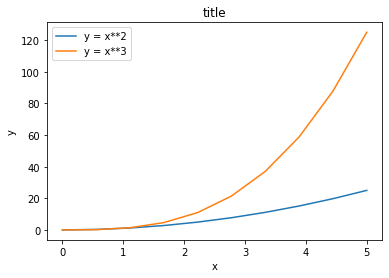

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=0)
ax.set_title('title');

### Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication.
First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the
font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, "$y=x^3$".

To avoid Python messing
up our latex code, we need to use \raw" text strings. Raw text strings are prepended with an `r', like
**r"nalpha"** or **r'nalpha'** instead of "\alpha" or '\alpha'

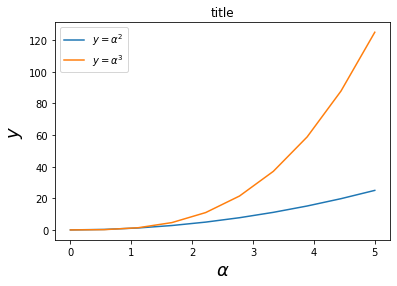

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.)

In [ ]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

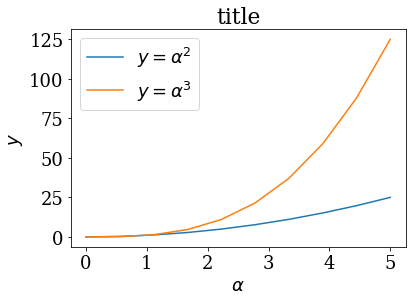

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the  STIX (Scientific and Technical Information Exchange) fonts

In [ ]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral','mathtext.fontset':'stix'})

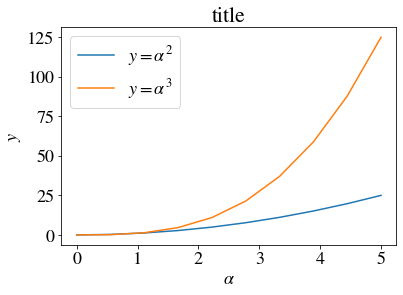

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### Setting colors, linewidths, linetypes

Colors

In [ ]:
# MATLAB style line color and style
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd") # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55") # RGB hex code for a greenish color

Line and marker styles

To change the line *width*, we can use the **linewidth** or **lw** keyword argument. 

The line *style* can be selected using the **linestyle** or **ls** keyword arguments

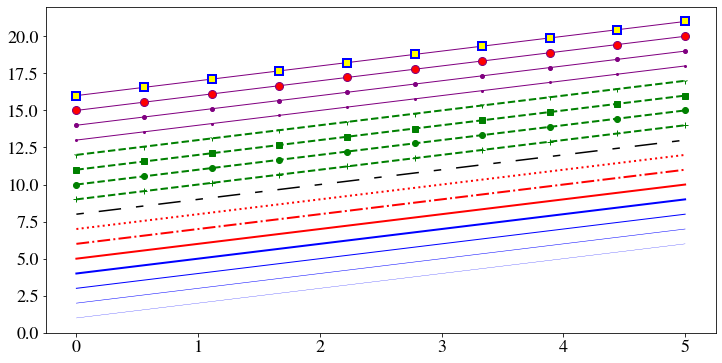

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)
# possible linestype options `-`, `--', `-.', `:', `steps'
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')
# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...
# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')
# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
98
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8,
markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the
font size and possibly the labels used on the axes.

Plot range

The first thing we might want to configure is the ranges of the axes.

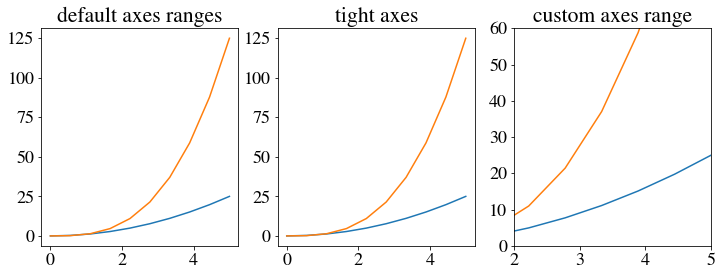

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")
axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")
axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes.

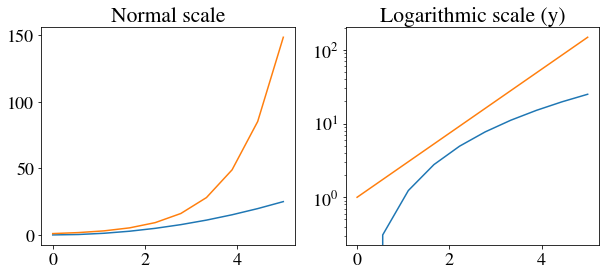

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")
axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with **set_xticks** and **set_yticks**, which both take a list of values for where on the axis the ticks are to be placed. We can also use the **set_xticklabels**
and **set_yticklabels** methods to provide a list of custom text labels for each tick location

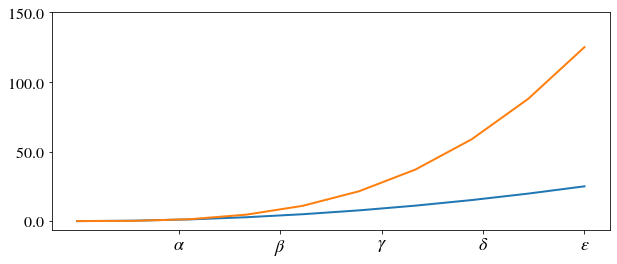

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, x**2, x, x**3, lw=2)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'])

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=16); # use LaTeX formatted labels

Scientific notation

With large numbers on axes, it is often better use scientific notation

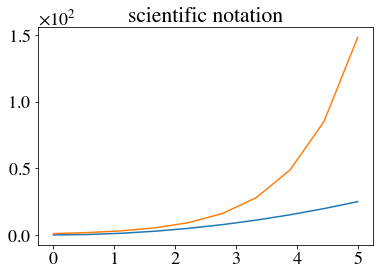

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")
ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker

formatter = ticker.ScalarFormatter(useMathText=True) #This module contains classes for configuring tick locating and formatting. 
                                                     #Generic tick locators and formatters are provided, as well as domain specific custom ones.
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.yaxis.set_major_formatter(formatter)

Axis number and axis label spacing

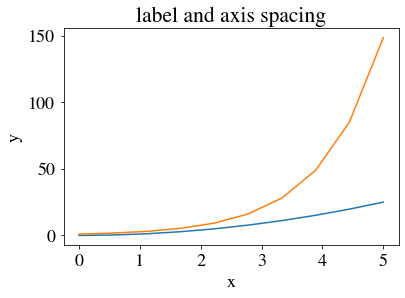

In [ ]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])
ax.set_title("label and axis spacing")
# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.set_xlabel("x")
ax.set_ylabel("y");

In [ ]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

Axis grid

With the **grid** method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the **plot** function

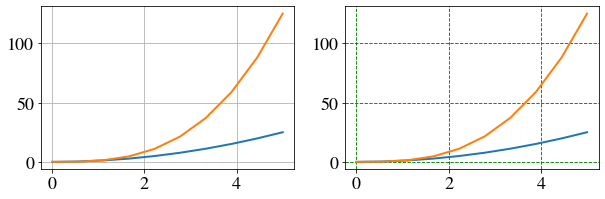

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)
# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='g', alpha=1, linestyle='dashed', linewidth=0.9)

Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different
units together. Matplotlib supports this with the **twinx** and **twiny** functions

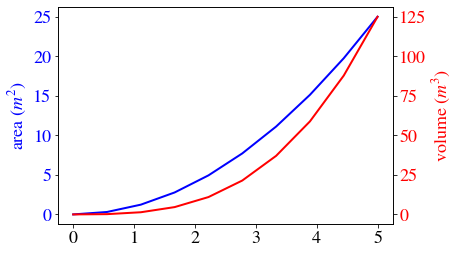

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
  label.set_color("blue")
  
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
  label.set_color("red")

Other 2D plot styles

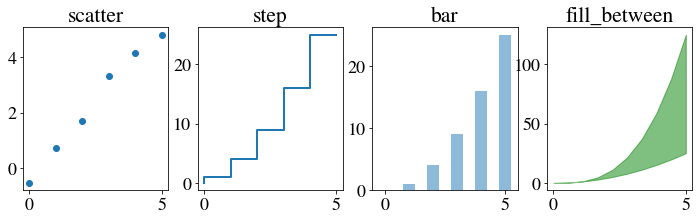

In [ ]:
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].scatter(n, n + 0.25*np.random.randn(len(n)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

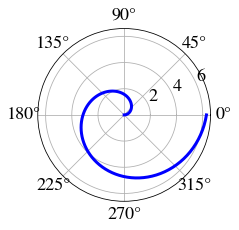

In [ ]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)

t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

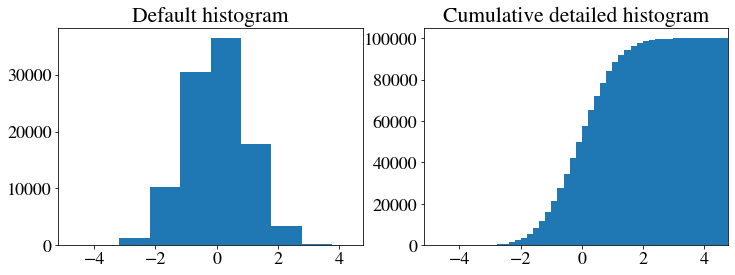

In [ ]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));